In [1]:
url = "https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?access\
       Type=DOWNLOAD"
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?access\
       Type=DOWNLOAD"

In [2]:
import urllib
urllib.urlretrieve(url, 'Fermont.csv')

('Fermont.csv', <httplib.HTTPMessage instance at 0x7fc293a647e8>)

In [3]:
urllib.urlretrieve(URL, 'Fermont1.csv')

('Fermont1.csv', <httplib.HTTPMessage instance at 0x7fc293a8a368>)

In [4]:
!head Fermont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
12/01/2014 12:00:00 AM,23689,24818
11/01/2012 12:00:00 AM,26062,24585
12/01/2012 12:00:00 AM,18608,17761
01/01/2015 12:00:00 AM,35754,24876
07/01/2017 12:00:00 AM,50973,67931
05/01/2017 12:00:00 AM,48267,60822
03/01/2013 12:00:00 AM,34443,31646
07/01/2016 12:00:00 AM,50373,55310
10/01/2013 12:00:00 AM,42188,39164


In [5]:
!head Fermont1.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [6]:
import pandas as pd
data = pd.read_csv("Fermont1.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


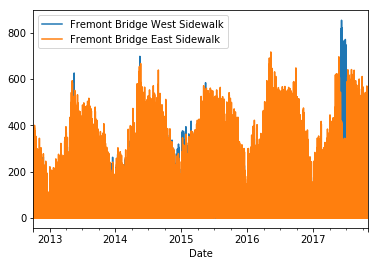

In [7]:
%matplotlib inline
data.plot();

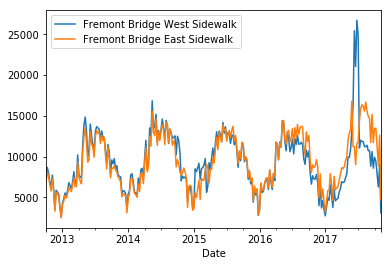

In [8]:
data.resample('W').sum().plot();

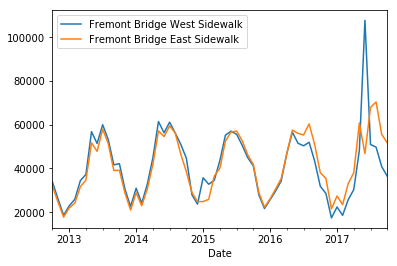

In [9]:
data.resample('M').sum().plot();

/home/alaa/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  after removing the cwd from sys.path.


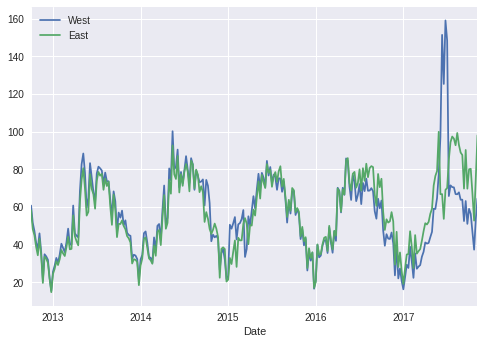

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.columns = ['West','East']
data.resample('W').plot();

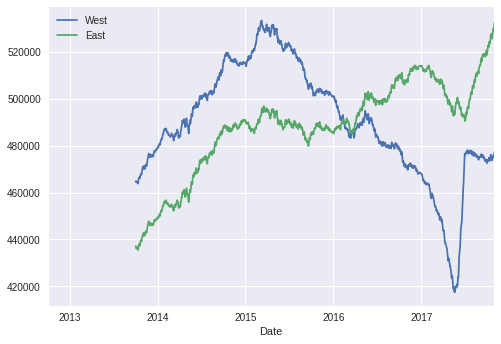

In [11]:
# the annual trend of data is calculated by resampling the data daily over
# each year, 
# so we could calculate the summation of data points of each day each year
data.resample('D').sum().rolling(365).sum().plot();

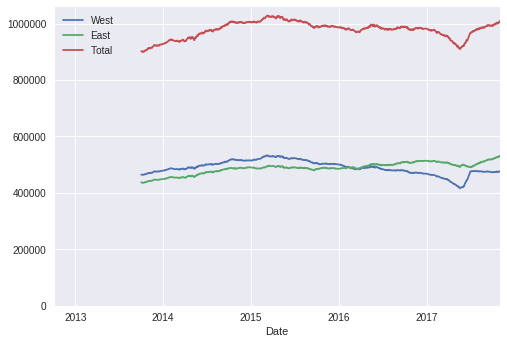

In [12]:
data['Total'] = data['East'] + data['West']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

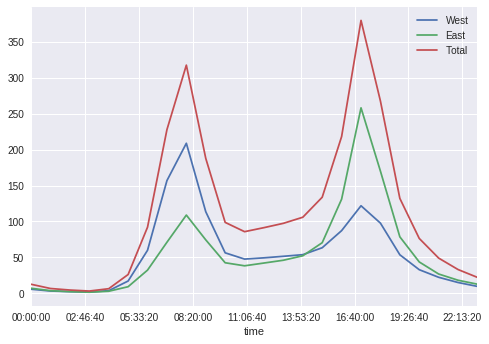

In [13]:
data.groupby(data.index.time).mean().plot();

In [14]:
data.pivot_table?

In [15]:
pivoted = data.pivot_table('Total', index=data.index.time,
                           columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [16]:
print(pivoted.shape)

(24, 1855)


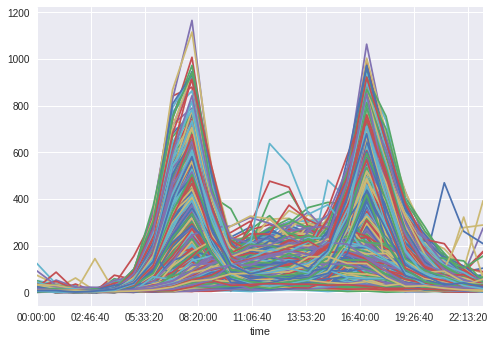

In [17]:
# a ine for each day in each year
pivoted.plot(legend=False)

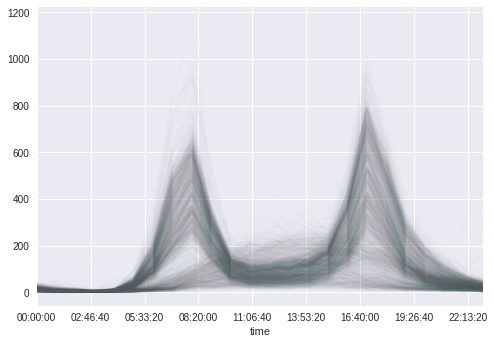

In [18]:
pivoted.plot(legend=False, alpha=0.01)